Import datajoint and setup connection

In [23]:
import datajoint as dj
import numpy as np
import pandas as pd

dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'

dj.config.save_local()

In [24]:
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

In [25]:
from tables import schema, Mouse, Session, Experimenter, Annotation, Pose, BehaviorTypes, Model

## Insert data into tables

### Mouse data

In [26]:
mouse_data = [(0, "2023-04-20", "M")
              ,(1, "2023-03-20", "F")
              ,(2, "2023-02-20", "F")
              ,(3, "2023-01-20", "M")]
Mouse.insert(mouse_data, skip_duplicates= True)
Mouse()

mouse_id Unique animal ID,dob date of birth,sex sex
0,2023-04-20,M
1,2023-03-20,F
2,2023-02-20,F
3,2023-01-20,M


### Session data

In [27]:
session_data = [(0, 0, "2023-04-20 00:00:01", 0, "VIDEO/TEST/PATH","POSE/TEST/PATH", "SLEAP", "LABEL/TEST/PATH", "BORIS")
                ,(0, 1, "2023-04-20 00:00:01", 0, "VIDEO/TEST/PATH","POSE/TEST/PATH", "SLEAP", "LABEL/TEST/PATH", "BORIS")
                ,(1, 2, "2023-04-20 00:00:01", 0, "VIDEO/TEST/PATH","POSE/TEST/PATH", "SLEAP", "LABEL/TEST/PATH", "BORIS")
                ,(2, 3, "2023-04-20 00:00:01", 0, "VIDEO/TEST/PATH","POSE/TEST/PATH", "SLEAP", "LABEL/TEST/PATH", "BORIS")]
Session.insert(session_data, skip_duplicates = True)

## Insert data into Lookup tables

### Model data

In [28]:
Model.insert1((0, "SingleInstance_OF_n=300", "Single instance", "2023-04-20", "A test model for open field video recordings of a single mouse"), skip_duplicates = True)


### Experimenter data

In [29]:
Experimenter.insert1((0, "Jens Tillmann", "M"), skip_duplicates = True)
Session * Experimenter

mouse_id Unique animal ID,session_id id of experiment,experimenter_id Unique experimenter ID,session_time time of experiment #todo: change to datetime,video_path path to video file,pose_path path to pose file,pose_origin origin of pose estimation (e.g. SLEAP),annotation_path path to annotation file,annotation_origin origin of annotation files (e.g. BORIS),name name of experimenter,sex sex
0,0,0,2023-04-20 00:00:01,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS,Jens Tillmann,M
0,1,0,2023-04-20 00:00:01,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS,Jens Tillmann,M
1,2,0,2023-04-20 00:00:01,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS,Jens Tillmann,M
2,3,0,2023-04-20 00:00:01,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS,Jens Tillmann,M


In [30]:
unique_labels = [(0, "test_sniff", "A Test class for sniffing")
                , (1, "nose_test", "A Test class for nose movement")
                , (2, "tail_wiggle", "A Test class for tail wiggling")]

BehaviorTypes.insert(unique_labels, skip_duplicates= True)
BehaviorTypes()

behavior_id Unique behavior ID,name name of behavior,description description of the behavior (optional)
0,test_sniff,A Test class for sniffing
1,nose_test,A Test class for nose movement
2,tail_wiggle,A Test class for tail wiggling


## Look at some table joins

In [31]:
Mouse * Session

mouse_id Unique animal ID,session_id id of experiment,dob date of birth,sex sex,session_time time of experiment #todo: change to datetime,"experimenter_id id of experimenter, linking to experimenter table",video_path path to video file,pose_path path to pose file,pose_origin origin of pose estimation (e.g. SLEAP),annotation_path path to annotation file,annotation_origin origin of annotation files (e.g. BORIS)
0,0,2023-04-20,M,2023-04-20 00:00:01,0,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS
0,1,2023-04-20,M,2023-04-20 00:00:01,0,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS
1,2,2023-03-20,F,2023-04-20 00:00:01,0,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS
2,3,2023-02-20,F,2023-04-20 00:00:01,0,VIDEO/TEST/PATH,POSE/TEST/PATH,SLEAP,LABEL/TEST/PATH,BORIS


## Populate tables and import data

In [32]:
Pose.populate()
Annotation.populate()
Pose * Annotation * Model

mouse_id Unique animal ID,session_id id of experiment,experimenter_id Unique experimenter ID,model_id Unique model ID,keypoints keypoints seperated by comma,"pose pose file as numpy array in style x,y,score per bodypart",annotations behavior file,unique_labels unique behavior labels seperated by comma,name name of model,type model architecture,training_date date the model was trained,description description of the model (optional)
0,0,0,0,"nose, neck, tail_base",=BLOB=,=BLOB=,"test_sniff, nose_test, tail_wiggle",SingleInstance_OF_n=300,Single instance,2023-04-20,A test model for open field video recordings of a single mouse
0,1,0,0,"nose, neck, tail_base",=BLOB=,=BLOB=,"test_sniff, nose_test, tail_wiggle",SingleInstance_OF_n=300,Single instance,2023-04-20,A test model for open field video recordings of a single mouse
1,2,0,0,"nose, neck, tail_base",=BLOB=,=BLOB=,"test_sniff, nose_test, tail_wiggle",SingleInstance_OF_n=300,Single instance,2023-04-20,A test model for open field video recordings of a single mouse
2,3,0,0,"nose, neck, tail_base",=BLOB=,=BLOB=,"test_sniff, nose_test, tail_wiggle",SingleInstance_OF_n=300,Single instance,2023-04-20,A test model for open field video recordings of a single mouse


## Compute some statistics

In [34]:
AnnotationStats.populate()
AnnotationStats * BehaviorTypes

mouse_id Unique animal ID,session_id id of experiment,experimenter_id Unique experimenter ID,behavior_id Unique behavior ID,n_events Number of events of a particular behavior,perc_event percentage of session of a particular behavior,name name of behavior,description description of the behavior (optional)
0,0,0,0,26,26.0,test_sniff,A Test class for sniffing
0,0,0,1,35,35.0,nose_test,A Test class for nose movement
0,0,0,2,39,39.0,tail_wiggle,A Test class for tail wiggling
0,1,0,0,27,27.0,test_sniff,A Test class for sniffing
0,1,0,1,35,35.0,nose_test,A Test class for nose movement
0,1,0,2,38,38.0,tail_wiggle,A Test class for tail wiggling
1,2,0,0,26,26.0,test_sniff,A Test class for sniffing
1,2,0,1,32,32.0,nose_test,A Test class for nose movement
1,2,0,2,42,42.0,tail_wiggle,A Test class for tail wiggling
2,3,0,0,51,51.0,test_sniff,A Test class for sniffing


C:\Users\JSchw\anaconda3\envs\datajoint_test\lib\inspect.py:350: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
C:\Users\JSchw\anaconda3\envs\datajoint_test\lib\inspect.py:350: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
C:\Users\JSchw\anaconda3\envs\datajoint_test\lib\inspect.py:350: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


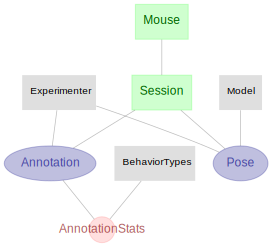

In [35]:
dj.Diagram(schema)